In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px
import seaborn as sb
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.callbacks import ModelCheckpoint
import os

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
credit_df = pd.read_csv( r'C:\Users\rajan\Downloads\german-credit.data', delim_whitespace = True, header = None)

In [4]:
credit_df.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
1,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
2,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
3,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
4,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1


In [5]:
columns = ['checkin_acc', 'duration', 'credit_history', 'purpose', 'amount',
           'saving_acc', 'present_emp_since', 'inst_rate', 'personal_status',
           'other_debtors', 'residing_since', 'property', 'age',
           'inst_plans', 'housing', 'num_credits',
           'job', 'dependents', 'telephone', 'foreign_worker', 'Credit_Risk_Status']

In [6]:
credit_df.columns = columns

In [7]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   checkin_acc         1001 non-null   object
 1   duration            1001 non-null   int64 
 2   credit_history      1001 non-null   object
 3   purpose             1001 non-null   object
 4   amount              1001 non-null   int64 
 5   saving_acc          1001 non-null   object
 6   present_emp_since   1001 non-null   object
 7   inst_rate           1001 non-null   int64 
 8   personal_status     1001 non-null   object
 9   other_debtors       1001 non-null   object
 10  residing_since      1001 non-null   int64 
 11  property            1001 non-null   object
 12  age                 1001 non-null   int64 
 13  inst_plans          1001 non-null   object
 14  housing             1001 non-null   object
 15  num_credits         1001 non-null   int64 
 16  job                 1001

In [8]:
credit_df.describe()
credit_df.head(1000)

,checkin_acc,duration,credit_history,purpose,amount,saving_acc,present_emp_since,inst_rate,personal_status,other_debtors,...,property,age,inst_plans,housing,num_credits,job,dependents,telephone,foreign_worker,Credit_Risk_Status
0,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
1,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
2,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
3,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
4,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,12,A32,A40,2390,A65,A75,4,A93,A101,...,A123,50,A143,A152,1,A173,1,A192,A201,1
996,A14,12,A32,A42,1736,A61,A74,3,A92,A101,...,A121,31,A143,A152,1,A172,1,A191,A201,1
997,A11,30,A32,A41,3857,A61,A73,4,A91,A101,...,A122,40,A143,A152,1,A174,1,A192,A201,1
998,A14,12,A32,A43,804,A61,A75,4,A93,A101,...,A123,38,A143,A152,1,A173,1,A191,A201,1


In [9]:
credit_df[credit_df.isnull()].count()

checkin_acc           0
duration              0
credit_history        0
purpose               0
amount                0
saving_acc            0
present_emp_since     0
inst_rate             0
personal_status       0
other_debtors         0
residing_since        0
property              0
age                   0
inst_plans            0
housing               0
num_credits           0
job                   0
dependents            0
telephone             0
foreign_worker        0
Credit_Risk_Status    0
dtype: int64

In [10]:
print(credit_df.nunique())
print(credit_df.head())

checkin_acc             5
duration               34
credit_history          6
purpose                11
amount                922
saving_acc              6
present_emp_since       6
inst_rate               5
personal_status         5
other_debtors           4
residing_since          5
property                5
age                    54
inst_plans              4
housing                 4
num_credits             5
job                     5
dependents              3
telephone               3
foreign_worker          3
Credit_Risk_Status      3
dtype: int64
  checkin_acc  duration credit_history purpose  amount saving_acc  \
0           0         1              2       3       4          5   
1         A11         6            A34     A43    1169        A65   
2         A12        48            A32     A43    5951        A61   
3         A14        12            A34     A46    2096        A61   
4         A11        42            A32     A42    7882        A61   

  present_emp_since  inst_

We will find the outliers by using seaborn library, we are using boxplot function to find ot and visualize the outliers.

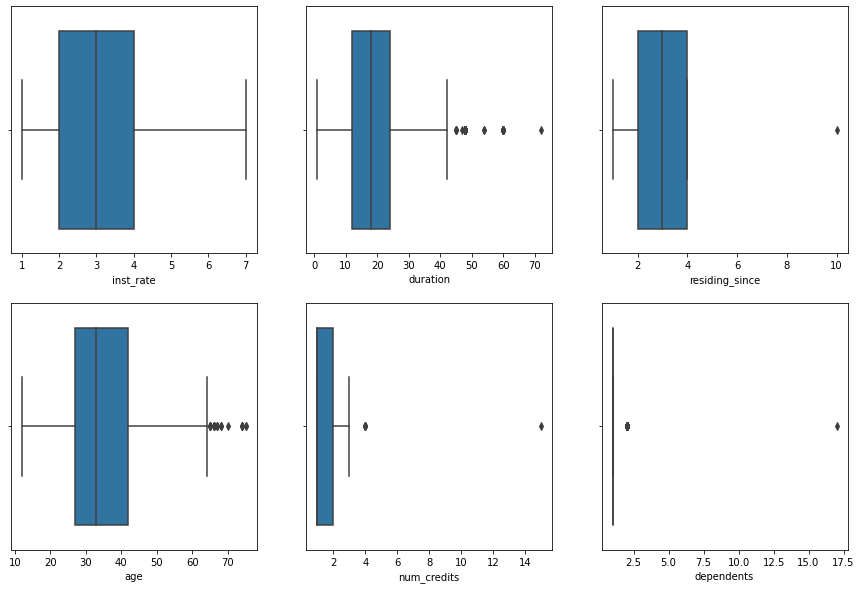

In [11]:
fig, axes = plt.subplots(2,3,figsize=(15,10))

sb.boxplot(x="inst_rate", data=credit_df, ax=axes[0, 0])
sb.boxplot(x="duration", data=credit_df, ax=axes[0, 1])
sb.boxplot(x="residing_since", data=credit_df, ax=axes[0, 2])
sb.boxplot(x="age", data=credit_df, ax=axes[1, 0])
sb.boxplot(x="num_credits", data=credit_df, ax=axes[1, 1])
sb.boxplot(x="dependents", data=credit_df, ax=axes[1, 2])


plt.show()

We will now remove the outliers.

In [12]:
credit_df = credit_df[credit_df.duration <= 43]
credit_df = credit_df[credit_df.age <= 55]
credit_df = credit_df[credit_df.dependents <= 1]
# X = X[X.duration <= 43]

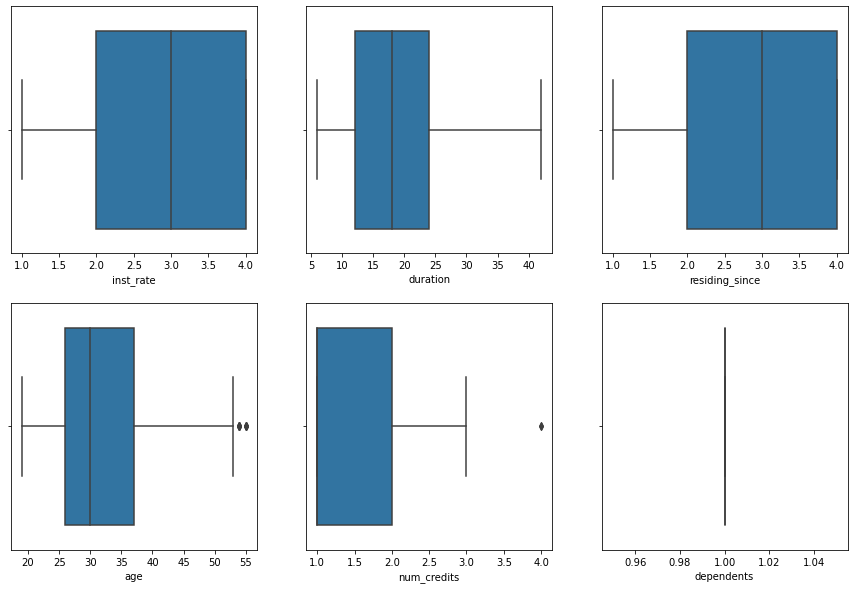

In [13]:
fig, axes = plt.subplots(2,3,figsize=(15,10))

sb.boxplot(x="inst_rate", data=credit_df, ax=axes[0, 0])
sb.boxplot(x="duration", data=credit_df, ax=axes[0, 1])
sb.boxplot(x="residing_since", data=credit_df, ax=axes[0, 2])
sb.boxplot(x="age", data=credit_df, ax=axes[1, 0])
sb.boxplot(x="num_credits", data=credit_df, ax=axes[1, 1])
sb.boxplot(x="dependents", data=credit_df, ax=axes[1, 2])


plt.show()

In [14]:
corr_analysis = credit_df.corr()

In [15]:
sb.set(rc={"figure.figsize":(50,17)})

<AxesSubplot:>

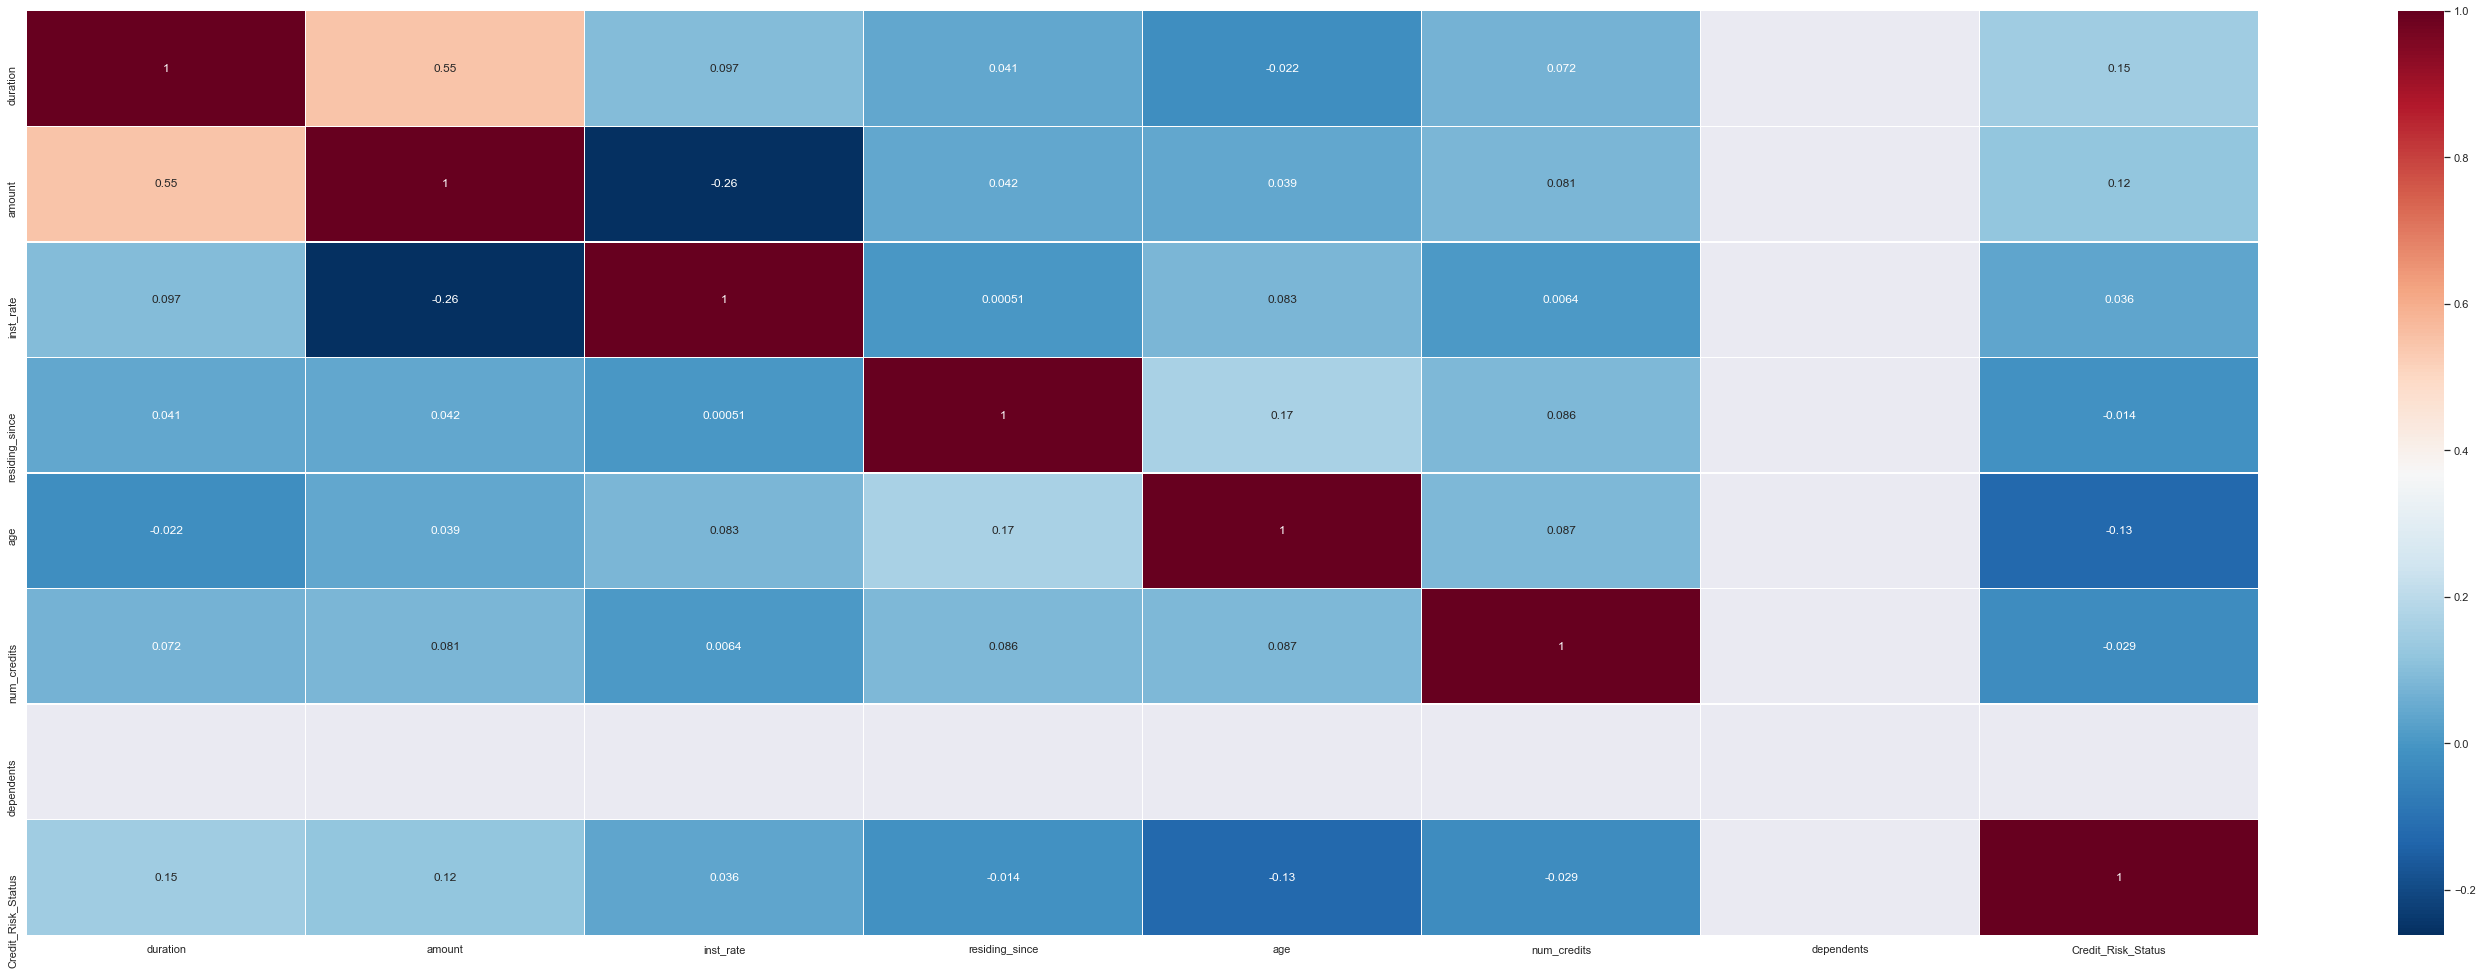

In [16]:
sb.heatmap(corr_analysis,
            xticklabels=corr_analysis.columns,
            yticklabels=corr_analysis.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.1)

We willexplore relation between three features: Customers Credit Amount, Instalment Rate and Age in years. We are using 3D Scatter Plot to plot those features. We can find out the Maximum values of the three features from the graph.

Text(0.5, 0, 'Age in years')

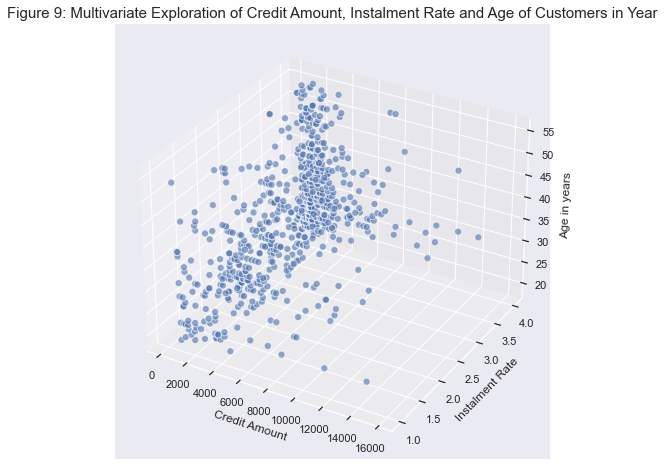

In [17]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
plt.title("Figure 9: Multivariate Exploration of Credit Amount, Instalment Rate and Age of Customers in Year", fontsize =15)

xs = credit_df['amount']
ys = credit_df['inst_rate']
zs = credit_df['age']
ax.scatter(xs, ys, zs, s=50, alpha=0.6, edgecolors='w')

ax.set_xlabel('Credit Amount')
ax.set_ylabel('Instalment Rate')
ax.set_zlabel('Age in years')

In [18]:
max_duration = np.amax(credit_df["duration"])
max_amount = np.amax(credit_df["amount"])
max_inst_rate = np.amax(credit_df["inst_rate"])
max_residing_since = np.amax(credit_df["residing_since"])
max_dependents = np.amax(credit_df["dependents"])
max_age = np.amax(credit_df["age"])
max_num_credits = np.amax(credit_df["num_credits"])

In [19]:
credit_df["duration"] = credit_df["duration"]/max_duration
credit_df["amount"] = credit_df["amount"]/max_amount
credit_df["inst_rate"] = credit_df["inst_rate"]/max_inst_rate
credit_df["residing_since"] = credit_df["residing_since"]/max_residing_since
credit_df["dependents"] = credit_df["dependents"]/max_dependents
credit_df["age"] = credit_df["age"]/max_age
credit_df["num_credits"] = credit_df["num_credits"]/max_num_credits

In [20]:
Y = credit_df.Credit_Risk_Status - 1
X = credit_df.drop("Credit_Risk_Status", axis=1)

In [21]:
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.027, random_state = 2 )
print("Training Data Size: ", X_train.shape[0])
print("Testing Data Size: ", X_test.shape[0])

Training Data Size:  706
Testing Data Size:  20


In [22]:
X_train = np.array(X_train)
y_train = np.array(keras.utils.to_categorical(y_train, 2))
X_test = np.array(X_test)
y_test = np.array(keras.utils.to_categorical(y_test, 2))

print(X_train[:10])
print(y_train[:10])

[['A13' 0.2857142857142857 'A31' 'A43' 0.02579302516238885 'A64' 'A73'
  0.75 'A92' 'A101' 0.75 'A121' 0.7636363636363637 'A143' 'A151' 0.5
  'A173' 1.0 'A191' 'A201']
 ['A14' 0.23809523809523808 'A32' 'A43' 0.1213344264362742 'A61' 'A73'
  0.25 'A93' 'A101' 1.0 'A122' 0.6909090909090909 'A143' 'A152' 0.25
  'A173' 1.0 'A192' 'A202']
 ['A14' 0.2857142857142857 'A34' 'A49' 0.0747304029766034 'A61' 'A73'
  0.75 'A92' 'A101' 0.5 'A121' 0.4909090909090909 'A143' 'A152' 0.5
  'A173' 1.0 'A191' 'A201']
 ['A12' 0.5714285714285714 'A32' 'A41' 0.25938071514157784 'A63' 'A72'
  0.75 'A92' 'A101' 1.0 'A123' 0.509090909090909 'A143' 'A151' 0.25
  'A173' 1.0 'A191' 'A201']
 ['A11' 0.21428571428571427 'A32' 'A40' 0.08967648357192406 'A61' 'A72'
  0.75 'A93' 'A101' 0.5 'A124' 0.4909090909090909 'A143' 'A153' 0.25
  'A174' 1.0 'A192' 'A201']
 ['A11' 0.5714285714285714 'A32' 'A42' 0.2039477833133632 'A61' 'A72' 1.0
  'A92' 'A101' 1.0 'A121' 0.41818181818181815 'A143' 'A151' 0.25 'A172'
  1.0 'A192' 'A2

In [23]:
model = Sequential()

model.add(Dense(256, activation="relu", input_shape=(X_train.shape[1],)))
model.add(Dropout(0.5))
model.add(Dense(128, activation="tanh"))
model.add(Dropout(0.5))
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(2, activation="softmax"))


model.compile(loss="categorical_crossentropy", optimizer="adamax", metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               5376      
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 2)                 2

In [25]:
hist = model.fit(X_train, y_train, epochs=25, batch_size=100, validation_split=0.25,
                 shuffle=True)

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type float).

In [ ]:
training_score = model.evaluate(X_train, y_train)
print("\n Training Accuracy:", training_score[1])
testing_score = model.evaluate(X_test, y_test)
print("\n Testing Accuracy:", testing_score[1])

In [ ]:
plt.figure(figsize=(12, 5))

plt.plot(hist.history['loss'], label='Categorical Cross Entropy Loss (training data)')
plt.plot(hist.history['val_loss'], label='Categorical Cross Entropy Loss (validation data)')
plt.title('Categorical Cross Entropy Loss')
plt.ylabel('Categorical Cross Entropy Loss')
plt.xlabel('No. epoch')
plt.legend(loc="upper right")
plt.show()

In [ ]:
results = model.predict(X_test, verbose=1)

In [ ]:
print("Predicted Results: ")
results

In [ ]:
y_real = np.argmax(y_test, axis=-1)
print("Actual Results: ")
y_real

In [ ]:
total = 0
# good = 0, bad = 1
for real, pred in zip(y_real, results):
    if real.any() == 0 and pred.any() == 1:
        total = total + 1
    elif real.any() == 1 and pred.any() == 0:
        total = total + 5
        
print("Final Score: ", total)